In [11]:
import pandas as pd 
from matplotlib import pyplot as plt
%matplotlib inline 
import numpy as np
from scipy.stats import norm
import seaborn as sns

In [3]:
df = pd.read_csv('height_weight.csv')
df.sample(20)

,gender,height,weight
7092,Female,66.934629,143.203782
6303,Female,60.159509,116.106376
3059,Male,61.611121,136.668509
899,Male,69.836552,176.011673
669,Male,66.455602,188.974847
2624,Male,63.724727,165.979417
519,Male,69.560229,187.217486
4840,Male,69.599795,208.948775
2133,Male,67.225930,177.306475
8017,Female,61.549107,107.520131


HISTOGRAM

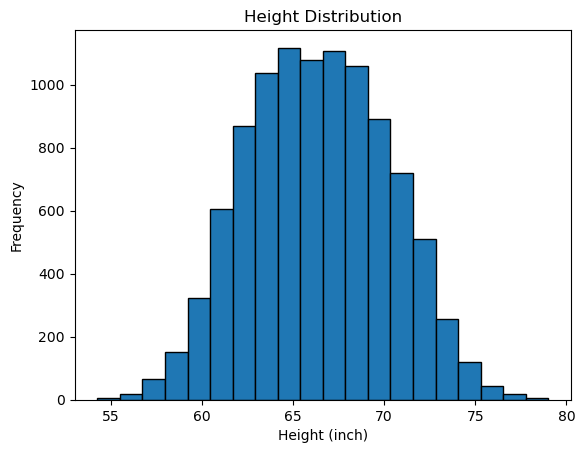

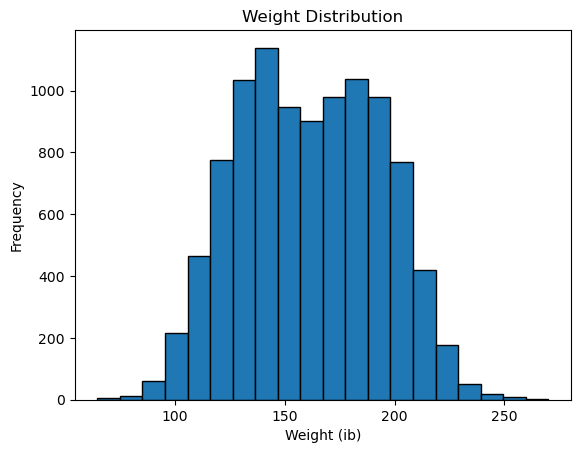

In [9]:
plt.hist(df.height, bins=20, edgecolor='black')
plt.title("Height Distribution")
plt.xlabel("Height (inch)")
plt.ylabel("Frequency")
plt.show()

# Plot histogram for Weight
plt.hist(df.weight, bins=20, edgecolor='black')
plt.title("Weight Distribution")
plt.xlabel("Weight (ib)")
plt.ylabel("Frequency")
plt.show()

In [24]:
#using IQR method to detect outliner in weight

In [14]:
Q1 = df.weight.quantile(0.25)
Q3 = df.weight.quantile(0.75)
Q1,Q3

(np.float64(135.8180513055015), np.float64(187.16952486868348))

In [15]:
IQR = Q3-Q1
IQR

np.float64(51.35147356318197)

In [16]:
lower_limit = Q1 - 1.5*IQR 
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit

(np.float64(58.79084096072856), np.float64(264.19673521345646))

In [17]:
df[(df.weight<lower_limit) | (df.weight>upper_limit)]

,gender,height,weight
2014,Male,78.998742,269.989699


In [23]:
clean_df = df[(df.weight>lower_limit) & (df.weight<upper_limit)]

In [25]:
#using IQR method to detect outliner in height

In [26]:
Q1 = clean_df.height.quantile(0.25)
Q3 = clean_df.height.quantile(0.75)
Q1,Q3

(np.float64(63.50534650086), np.float64(69.1720691536175))

In [28]:
IQR = Q3 - Q1
IQR

np.float64(5.6667226527575)

In [29]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit

(np.float64(55.00526252172375), np.float64(77.67215313275375))

In [32]:
clean_df[(clean_df.height<lower_limit) | (clean_df.height>upper_limit)]

,gender,height,weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
9285,Female,54.263133,64.700127


In [34]:
final = clean_df[(clean_df.height>lower_limit) & (clean_df.height<upper_limit)]
final

,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [36]:
final.to_csv('final.csv',index=False)

In [38]:
final.to_excel('final1.xlsx',index=False)
